# OONI Data Analysis - Preliminary Exploration

In [66]:
# Imports
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
import numpy as np
import os
from urllib.parse import urlparse

In [67]:
# Plot configuration
seaborn.set_style('dark')

## (1) Data Cleaning
In this step we load and clean up the pre-procsesed data in order to get it into a form that can be analyzed.

In [68]:
# Load the pre-processed data and set up the index based on date
data_dir = '../results/ZM/processed/2022/'
web_connectivity = pd.read_csv(os.path.join(data_dir, 'webconnectivity.csv'))
web_connectivity['date'] = pd.to_datetime(web_connectivity['date'])
web_connectivity = web_connectivity.set_index('date')
web_connectivity

,probe_asn,dns_consistency,resolver_asn,body_length_match,dns_experiment_failure,headers_match,x_null_null_flags,input,x_dns_flags,blocking,accessible,http_experiment_failure,status_code_match,title_match,control_failure,x_blocking_flags,body_proportion
date,,,,,,,,,,,,,,,,,
2022-01-06,AS30969,inconsistent,NaN,True,unknown_failure [Errno 65] No route to host,True,NaN,http://www.eurogrand.com/,NaN,False,False,NaN,True,NaN,NaN,NaN,1.000000
2022-01-06,AS30969,inconsistent,NaN,True,unknown_failure [Errno 65] No route to host,True,NaN,http://www.euthanasia.cc/,NaN,False,False,NaN,True,True,NaN,NaN,1.000000
2022-01-06,AS30969,inconsistent,NaN,True,unknown_failure [Errno 65] No route to host,True,NaN,http://www.europacasino.com/,NaN,False,False,NaN,True,True,NaN,NaN,1.000000
2022-01-06,AS30969,inconsistent,NaN,True,unknown_failure [Errno 65] No route to host,True,NaN,https://www.eveonline.com/,NaN,False,False,NaN,True,NaN,NaN,NaN,1.000000
2022-01-06,AS30969,inconsistent,NaN,True,unknown_failure [Errno 65] No route to host,True,NaN,http://www.excite.com/,NaN,False,False,NaN,True,NaN,NaN,NaN,0.971079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29,AS37154,consistent,AS15169,True,NaN,True,NaN,https://kaleidoscopetrust.com/,NaN,False,True,NaN,True,True,NaN,NaN,1.000000
2022-12-29,AS37154,consistent,AS15169,True,NaN,True,NaN,https://laborrights.org/,NaN,False,True,NaN,True,True,NaN,NaN,1.000000
2022-12-29,AS37154,consistent,AS15169,True,NaN,True,NaN,https://lalgbtcenter.org/,NaN,False,True,NaN,True,True,NaN,NaN,0.997485


In [69]:
# Standardize URLs
def url_standardize(url):
    p = urlparse(url)
    b = p.netloc.split('.')
    c = '.'.join(b[len(b)-2:])  # Remove any www
    return c+p.path
    
web_connectivity['input'] = web_connectivity['input'].map(url_standardize)

In [70]:
# Filter data into specific blocking methods
print(f"total: {len(web_connectivity)}")
dns_events = web_connectivity[web_connectivity['blocking'] == 'dns']
print(f"dns: {len(dns_events)}")
httpdiff_events = web_connectivity[web_connectivity['blocking'] == 'http-diff']
print(f"diff: {len(httpdiff_events)}")
httpfail_events = web_connectivity[web_connectivity['blocking'] == 'http-failure']
print(f"fail: {len(httpfail_events)}")
tcp_events = web_connectivity[web_connectivity['blocking'] == 'tcp_ip']
print(f"tcp: {len(tcp_events)}")
web_connectivity['blocking'].unique()

total: 46832
dns: 3364
diff: 150
fail: 2137
tcp: 273


array(['False', 'dns', nan, 'http-failure', 'http-diff', 'tcp_ip'],
      dtype=object)

## (2) Data Exploration

In [71]:
# Compute rolling totals
k=7
date_range = pd.date_range(start="2022-01-01", end="2022-12-31", freq='D')

temp_events = web_connectivity.groupby(web_connectivity.index).size()
total_events = temp_events.reindex(date_range, fill_value=0).rolling(window=k).sum().dropna()

temp_dns = dns_events.groupby(dns_events.index).size()
total_dns = temp_dns.reindex(date_range, fill_value=0).rolling(window=k).sum().dropna()

temp_httpdiff = httpdiff_events.groupby(httpdiff_events.index).size()
total_httpdiff = temp_httpdiff.reindex(date_range, fill_value=0).rolling(window=k).sum().dropna()

temp_httpfail = httpfail_events.groupby(httpfail_events.index).size()
total_httpfail = temp_httpfail.reindex(date_range, fill_value=0).rolling(window=k).sum().dropna()

temp_tcp = tcp_events.groupby(tcp_events.index).size()
total_tcp = temp_tcp.reindex(date_range, fill_value=0).rolling(window=k).sum().dropna()



"""
total_dns = dns_events.groupby(dns_events.index).size().rolling(window=k).sum().dropna()
total_httpdiff = httpdiff_events.groupby(httpdiff_events.index).size().rolling(window=k).sum().dropna()
total_httpfail = httpfail_events.groupby(httpfail_events.index).size().rolling(window=k).sum().dropna()
total_tcp = tcp_events.groupby(tcp_events.index).size().rolling(window=k).sum().dropna()"
"""

'\ntotal_dns = dns_events.groupby(dns_events.index).size().rolling(window=k).sum().dropna()\ntotal_httpdiff = httpdiff_events.groupby(httpdiff_events.index).size().rolling(window=k).sum().dropna()\ntotal_httpfail = httpfail_events.groupby(httpfail_events.index).size().rolling(window=k).sum().dropna()\ntotal_tcp = tcp_events.groupby(tcp_events.index).size().rolling(window=k).sum().dropna()"\n'

In [72]:
print(web_connectivity.head())

           probe_asn dns_consistency resolver_asn body_length_match  \
date                                                                  
2022-01-06   AS30969    inconsistent          NaN              True   
2022-01-06   AS30969    inconsistent          NaN              True   
2022-01-06   AS30969    inconsistent          NaN              True   
2022-01-06   AS30969    inconsistent          NaN              True   
2022-01-06   AS30969    inconsistent          NaN              True   

                                 dns_experiment_failure headers_match  \
date                                                                    
2022-01-06  unknown_failure [Errno 65] No route to host          True   
2022-01-06  unknown_failure [Errno 65] No route to host          True   
2022-01-06  unknown_failure [Errno 65] No route to host          True   
2022-01-06  unknown_failure [Errno 65] No route to host          True   
2022-01-06  unknown_failure [Errno 65] No route to host         

In [73]:
print(len(web_connectivity[web_connectivity.index == "2022-01-12"]))

3074


In [74]:
print(total_events.head())
print(total_dns.head())


2022-01-07    2632.0
2022-01-08    3478.0
2022-01-09    5609.0
2022-01-10    7078.0
2022-01-11    7667.0
Freq: D, dtype: float64
2022-01-07     697.0
2022-01-08     913.0
2022-01-09    1478.0
2022-01-10    1832.0
2022-01-11    1976.0
Freq: D, dtype: float64


In [75]:
print(web_connectivity.groupby(web_connectivity.index).size().rolling(window=k).sum()["2022-04-05"])
print(dns_events.groupby(dns_events.index).size().rolling(window=k).sum()["2022-04-05"])

219.0
2016.0


In [76]:
print(type(dns_events.groupby(dns_events.index).size()))

<class 'pandas.core.series.Series'>


In [77]:
print(total_events["2022-04-05"])
print(total_dns["2022-04-05"])
print("----------")
print(dns_events.groupby(dns_events.index).size()["2022-04-05"])
print(dns_events.groupby(dns_events.index).size()["2022-09-23"])


219.0
1.0
----------
1
148


In [78]:
# Compute fractional events
frac_dns = total_dns/total_events
frac_httpdiff = total_httpdiff/total_events
frac_httpfail = total_httpfail/total_events
frac_tcp = total_tcp/total_events
frac_dns = frac_dns.fillna(0)
frac_httpdiff = frac_httpdiff.fillna(0)
frac_httpfail = frac_httpfail.fillna(0)
frac_tcp = frac_tcp.fillna(0)

In [79]:
print(total_events["2022-04-04"])
print(total_events["2022-04-05"])
print(total_events["2022-04-06"])
print(total_dns["2022-04-05"])
print(frac_dns["2022-04-05"])
print(frac_httpdiff["2022-04-05"])
print(frac_httpfail["2022-04-05"])
print(frac_tcp["2022-04-05"])

168.0
219.0
231.0
1.0
0.0045662100456621
0.0045662100456621
0.1004566210045662
0.0228310502283105


Text(0.5, 1.0, 'Fractional Blocking Events Over Time (k=7)')

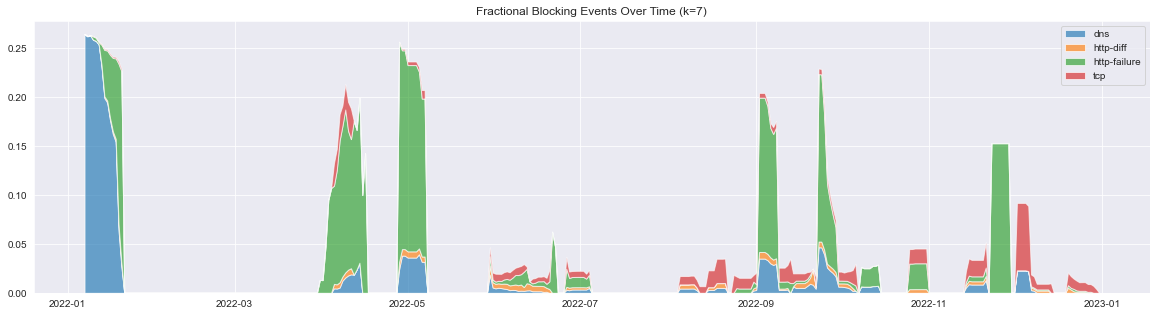

In [80]:
# Plot fractional events
plt.rcParams['figure.figsize'] = [20, 5]
plt.stackplot(total_events.index, frac_dns, frac_httpdiff, frac_httpfail, frac_tcp, labels=['dns', 'http-diff', 'http-failure', 'tcp'], alpha=0.65)
plt.legend()
plt.grid()
plt.title(f'Fractional Blocking Events Over Time (k={k})')

Text(0.5, 1.0, 'Fractional Blocking Events From 2022-04-04-2022-04-06 (k=7)')

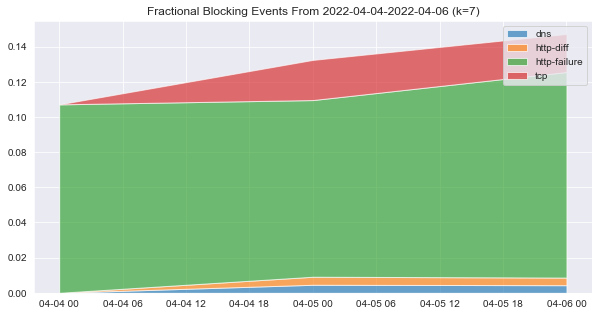

In [81]:
# Zoom in on a region of interest
start_date = '2022-04-04'
end_date = '2022-04-06'
filter_range = total_events.index[(total_events.index >= start_date) & (total_events.index <= end_date)]
plt.rcParams['figure.figsize'] = [10, 5]
plt.stackplot(filter_range, frac_dns[filter_range], frac_httpdiff[filter_range], frac_httpfail[filter_range], frac_tcp[filter_range], labels=['dns', 'http-diff', 'http-failure', 'tcp'], alpha=0.65)
plt.legend()
plt.grid()
plt.title(f'Fractional Blocking Events From {start_date}-{end_date} (k={k})')

In [10]:
# Get blocking events in small date range
filter_tcp_range = (tcp_events.index >= start_date) & (tcp_events.index <= end_date)
filter_total_range = (web_connectivity.index >= start_date) & (web_connectivity.index <= end_date)
tcp_during = tcp_events[filter_tcp_range].groupby('input').size()
total_during = web_connectivity[filter_total_range].groupby('input').size()
frac_tcp_during = (tcp_during/total_during).fillna(0)
tcp_during.sort_values(ascending=False)
#print((tcp_during/total_during.sum()).sort_values(ascending=False)[:20])
tcp_out = tcp_events[~filter_tcp_range].groupby('input').size()
total_out = web_connectivity[~filter_total_range].groupby('input').size()
frac_tcp_out = (tcp_out/total_out).fillna(0)
#print((tcp_out/total_out.sum()).sort_values(ascending=False)[:20])
diff_frac_tcp = (frac_tcp_during-frac_tcp_out).sort_values(ascending=False).dropna()
diff_frac_tcp[:30]

input
amunzi.com/                                                                     0.895833
signal.org/                                                                     0.732456
43things.com/                                                                   0.000000
openvpn.net/                                                                    0.000000
redditstatic.com/robots.txt                                                     0.000000
redditmedia.com/robots.txt                                                      0.000000
reddit.com/                                                                     0.000000
quoracdn.net/main-thumb-1117688072-200-uijiqfjcmlvaxczdrlawbgyaomfocdnt.jpeg    0.000000
quoracdn.net/-4-web.entry.js.out-34-8f7d03da0b7a24ae.webpack                    0.000000
protectioninternational.org/                                                    0.000000
pixelfed.social/                                                                0.000000
pinimg.com/robo

In [11]:
from statsmodels.stats.proportion import proportions_ztest

blocking_start = "2022-03-24"
blocking_end = "2022-04-18"

inner_range = (web_connectivity.index >= start_date) & (web_connectivity.index <= end_date)
outer_range = (web_connectivity.index < start_date) | (web_connectivity.index > end_date)
tcp_during = web_connectivity[inner_range].groupby('blocking').size()
tcp_outside = web_connectivity[outer_range].groupby('blocking').size()

successes = [tcp_during.sum() - tcp_during["False"], tcp_outside.sum() - tcp_outside["False"]]
sample_sizes = [tcp_during.sum(), tcp_outside.sum()]
print(successes)
print(sample_sizes)
z_stat, p_value = proportions_ztest(successes, sample_sizes)
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")
print(successes[0] / sample_sizes[0])
print(successes[1] / sample_sizes[1])

[48, 5876]
[310, 45580]
Z-Statistic: 1.3565985860604715
P-Value: 0.17490879128613368
0.15483870967741936
0.12891619131197893


In [12]:
import scipy.stats as stats

# Chi-square test of independence of variables
grouped_frame = pd.DataFrame({
    "during": tcp_during,
    "outside": tcp_outside
})
chi2, p_value, dof, expected = stats.chi2_contingency(grouped_frame.T)  # .T to transpose and get the correct format

# Step 3: Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square statistic: 64.99360154857696
P-value: 2.581202484535954e-13


In [13]:
tcp_blocked = tcp_events[filter_tcp_range].groupby('input').size()
print(len(tcp_blocked))
for i, j in tcp_during.items():
    print(str(i) + " " + str(j))

2
False 262
dns 3
http-diff 1
http-failure 39
tcp_ip 5


Text(0.5, 1.0, 'Fractional Blocking Events Over Time (k=7)')

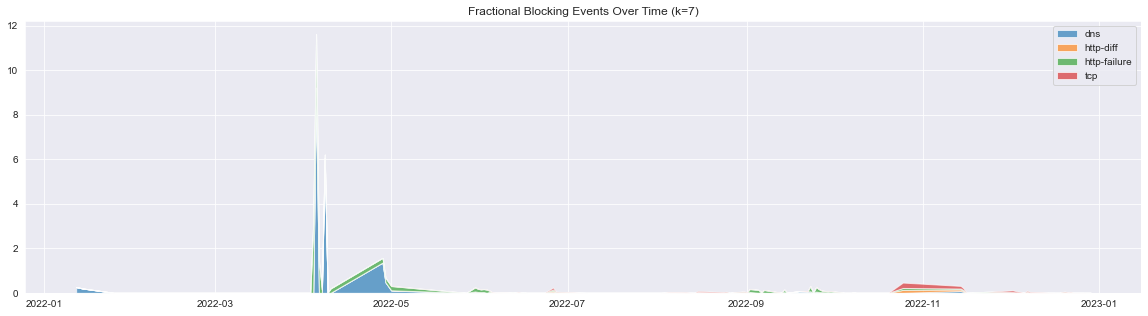

In [14]:
# Plot fractional events
plt.rcParams['figure.figsize'] = [20, 5]
plt.stackplot(total_events.index, frac_dns, frac_httpdiff, frac_httpfail, frac_tcp, labels=['dns', 'http-diff', 'http-failure', 'tcp'], alpha=0.65)
plt.legend()
plt.grid()
plt.title(f'Fractional Blocking Events Over Time (k={k})')

In [15]:
# Extract known blocking methods
web_maybe_blocked = web_connectivity.loc[(web_connectivity['blocking'] != 'False') & (~web_connectivity['blocking'].isnull())]
web_maybe_blocked = web_maybe_blocked.sort_values(by=["input", "date"])
wmbi = web_maybe_blocked.set_index(['input', web_maybe_blocked.index])
wmbi

probe_asn dns_consistency resolver_asn  \
input          date                                                
0.1/dns-query  2022-01-10   AS30969    inconsistent          NaN   
               2022-04-29   AS30969    inconsistent          NaN   
               2022-09-02   AS30969    inconsistent          NaN   
               2022-09-23   AS30969    inconsistent          NaN   
               2022-09-23   AS30969    inconsistent          NaN   
...                             ...             ...          ...   
zanzu.nl/      2022-09-02   AS30969      consistent          NaN   
               2022-09-23   AS30969      consistent          NaN   
zoomshare.com/ 2022-09-02   AS30969      consistent          NaN   
               2022-09-23   AS30969      consistent          NaN   
               2022-09-23   AS30969      consistent          NaN   

                          body_length_match dns_experiment_failure  \
input          date                                                  
0.1/dns-query  2022-01-10               NaN                    NaN   
               2022-04-29               NaN                    NaN   
               2022-09-02               NaN                    NaN   
               2022-09-23               NaN                    NaN   
               2022-09-23               NaN                    NaN   
...                                     ...                    ...   
zanzu.nl/      2022-09-02               NaN                    NaN   
               2022-09-23               NaN                    NaN   
zoomshare.com/ 2022-09-02               NaN                    NaN   
               2022-09-23               NaN                    NaN   
               2022-09-23               NaN                    NaN   

                          headers_match  x_null_null_flags  x_dns_flags  \
input          date                                                       
0.1/dns-query  2022-01-10           NaN                NaN          NaN   
               2022-04-29           NaN                NaN          NaN   
               2022-09-02           NaN                NaN          NaN   
               2022-09-23           NaN                NaN          NaN   
               2022-09-23           NaN                NaN          NaN   
...                                 ...                ...          ...   
zanzu.nl/      2022-09-02           NaN                NaN          NaN   
               2022-09-23           NaN                NaN          NaN   
zoomshare.com/ 2022-09-02           NaN                NaN          NaN   
               2022-09-23           NaN                NaN          NaN   
               2022-09-23           NaN                NaN          NaN   

                               blocking accessible  http_experiment_failure  \
input          date                                                           
0.1/dns-query  2022-01-10           dns      False  response_never_received   
               2022-04-29           dns      False  response_never_received   
               2022-09-02           dns      False  response_never_received   
               2022-09-23           dns      False  response_never_received   
               2022-09-23           dns      False  response_never_received   
...                                 ...        ...                      ...   
zanzu.nl/      2022-09-02  http-failure      False  response_never_received   
               2022-09-23  http-failure      False  response_never_received   
zoomshare.com/ 2022-09-02  http-failure      False  response_never_received   
               2022-09-23  http-failure      False  response_never_received   
               2022-09-23  http-failure      False  response_never_received   

                          status_code_match title_match control_failure  \
input          date                                                       
0.1/dns-query  2022-01-10               NaN         NaN             NaN   
 

In [16]:
# Find sites with largest number of blocking events
topw = wmbi.groupby(level=0).size().sort_values(ascending=False)
topw

input
lycos.com/                   55
torproject.org/              44
org.uk/                      41
backtrack-linux.org/         28
secfirst.org/                28
                             ..
gitlab.io/                    1
cidh.org/                     1
rfi.fr/                       1
topcities.com/                1
humanrightsconnected.org/     1
Length: 710, dtype: int64

In [17]:
# Get data from the top blocking events
wmbi.loc[topw[topw > 10].index]

probe_asn dns_consistency  \
input                        date                                   
lycos.com/                   2022-01-06   AS30969    inconsistent   
                             2022-01-06   AS30969    inconsistent   
                             2022-01-06   AS30969    inconsistent   
                             2022-01-06   AS30969    inconsistent   
                             2022-01-07   AS30969    inconsistent   
...                                           ...             ...   
244.244/tor/server/authority 2022-09-29   AS36959      consistent   
                             2022-09-29   AS36959      consistent   
                             2022-09-29   AS36959      consistent   
                             2022-09-29   AS36959      consistent   
                             2022-10-25   AS30844      consistent   

                                        resolver_asn body_length_match  \
input                        date                                        
lycos.com/                   2022-01-06          NaN               NaN   
                             2022-01-06          NaN               NaN   
                             2022-01-06          NaN               NaN   
                             2022-01-06          NaN               NaN   
                             2022-01-07          NaN               NaN   
...                                              ...               ...   
244.244/tor/server/authority 2022-09-29      AS15169               NaN   
                             2022-09-29      AS15169               NaN   
                             2022-09-29      AS15169               NaN   
                             2022-09-29      AS15169               NaN   
                             2022-10-25      AS15169               NaN   

                                                              dns_experiment_failure  \
input                        date                                                      
lycos.com/                   2022-01-06  unknown_failure [Errno 65] No route to host   
                             2022-01-06  unknown_failure [Errno 65] No route to host   
                             2022-01-06  unknown_failure [Errno 65] No route to host   
                             2022-01-06  unknown_failure [Errno 65] No route to host   
                             2022-01-07  unknown_failure [Errno 65] No route to host   
...                                                                              ...   
244.244/tor/server/authority 2022-09-29                                          NaN   
                             2022-09-29                                          NaN   
                             2022-09-29                                          NaN   
                             2022-09-29                                          NaN   
                             2022-10-25                                          NaN   

                                        headers_match  x_null_null_flags  \
input                        date                                          
lycos.com/                   2022-01-06           NaN                NaN   
                             2022-01-06           NaN                NaN   
                             2022-01-06           NaN                NaN   
                             2022-01-06           NaN                NaN   
                             2022-01-07           NaN                NaN   
...                                               ...                ...   
244.244/tor/server/authority 2022-09-29           NaN                NaN   
                             2022-09-29           NaN                NaN   
                             2022-09-29           NaN                NaN   
                             2022-09-29           NaN                NaN   
                             2022-10-25           NaN                NaN   

                                         x_dn

In [18]:
sel = wmbi.loc[topw[topw > 10].index].loc[topw.index[10]]
ma = sel['blocking'] == 'dns'
sel[ma]

,probe_asn,dns_consistency,resolver_asn,body_length_match,dns_experiment_failure,headers_match,x_null_null_flags,x_dns_flags,blocking,accessible,http_experiment_failure,status_code_match,title_match,control_failure,x_blocking_flags,body_proportion
date,,,,,,,,,,,,,,,,
2022-01-06,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-06,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-07,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-07,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-08,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-08,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-09,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-09,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-10,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN


In [19]:
web_connectivity.loc[web_connectivity['input'] == topw.index[0]]

,probe_asn,dns_consistency,resolver_asn,body_length_match,dns_experiment_failure,headers_match,x_null_null_flags,input,x_dns_flags,blocking,accessible,http_experiment_failure,status_code_match,title_match,control_failure,x_blocking_flags,body_proportion
date,,,,,,,,,,,,,,,,,
2022-01-06,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,lycos.com/,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-06,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,lycos.com/,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-06,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,lycos.com/,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-06,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,lycos.com/,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
2022-01-07,AS30969,inconsistent,NaN,NaN,unknown_failure [Errno 65] No route to host,NaN,NaN,lycos.com/,NaN,dns,False,response_never_received,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,AS36959,consistent,AS15169,True,NaN,True,NaN,lycos.com/,NaN,False,True,NaN,True,True,NaN,NaN,1.000000
2022-12-22,AS30844,consistent,AS30844,True,NaN,True,NaN,lycos.com/,NaN,False,True,NaN,True,True,NaN,NaN,0.999921
2022-12-22,AS30844,consistent,AS30844,True,NaN,True,NaN,lycos.com/,NaN,False,True,NaN,True,True,NaN,NaN,1.000000


In [20]:
# Group all events by input calculate totals
dns_grouped = dns_events.groupby('input').size() # sort_values(ascending=False)
httpdiff_grouped = httpdiff_events.groupby('input').size()
httpfail_grouped = httpfail_events.groupby('input').size()
tcp_grouped = tcp_events.groupby('input').size()
totals_grouped = web_connectivity.groupby('input').size()

In [21]:
noblock_events = web_connectivity[(web_connectivity['blocking'] == 'False') | (web_connectivity['blocking'].isnull())]
noblock_grouped = noblock_events.groupby('input').size()

In [22]:
# Calculate fraction of events blocked per input
frac_dns_grouped = (dns_grouped / totals_grouped).dropna().sort_values(ascending=False)
frac_httpdiff_grouped = (httpdiff_grouped / totals_grouped).dropna().sort_values(ascending=False)
frac_httpfail_grouped = (httpfail_grouped / totals_grouped).dropna().sort_values(ascending=False)
frac_tcp_grouped = (tcp_grouped / totals_grouped).dropna().sort_values(ascending=False)

In [23]:
# Get all events grouped by the type of blocking event
all_grouped = pd.DataFrame({'dns': frac_dns_grouped, 'httpdiff': frac_httpdiff_grouped, 'httpfail': frac_httpfail_grouped, 'tcp': frac_tcp_grouped}).fillna(0)
all_grouped

,dns,httpdiff,httpfail,tcp
input,,,,
0.1/dns-query,0.200000,0.000000,0.000000,0.000000
0.3/dns-query,0.111111,0.000000,0.000000,0.000000
0.39:9131/tor/server/authority,0.000000,0.000000,0.000000,0.021739
1.1/dns-query,0.178571,0.000000,0.107143,0.000000
1.3/dns-query,0.100000,0.000000,0.100000,0.000000
...,...,...,...,...
zambiareports.com/2016/03/18/is-state-house-endorsing-faz-corruption/,0.054054,0.000000,0.000000,0.000000
zambiawatchdog.com/corrupt-lungu-will-go-straight-to-jail-nawakwi/,0.000000,0.062500,0.000000,0.000000
zambiawatchdog.com/lungu-trying-to-blame-ritual-killings-on-opposition/,0.000000,0.064516,0.000000,0.000000


In [24]:
# Extract the top N sites
nn = 100
top_n_idx = all_grouped.sum(axis=1).sort_values(ascending=False)[0:nn].index
top_n = all_grouped.loc[top_n_idx]
top_n

,dns,httpdiff,httpfail,tcp
input,,,,
xfocus.org/,0.400000,0.0,0.533333,0.066667
postzambia.com/news.php,0.545455,0.0,0.454545,0.000000
postzambia.com/,0.545455,0.0,0.454545,0.000000
gov.za/,0.000000,0.0,1.000000,0.000000
hrw.org/africa/south-africa,1.000000,0.0,0.000000,0.000000
...,...,...,...,...
oikoumene.org/,0.318182,0.0,0.318182,0.000000
911truth.org/,0.363636,0.0,0.272727,0.000000
pcgamer.com/,0.500000,0.0,0.136364,0.000000


In [25]:
# Calculate cumulative values
c_top_n = top_n.cumsum(axis=1)

Text(0.5, 0, 'Fraction of events')

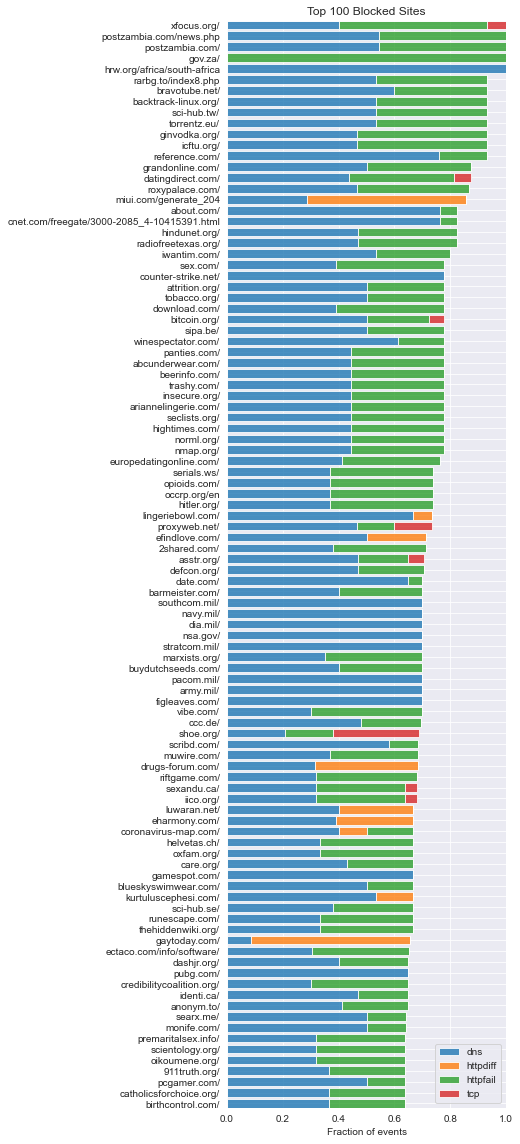

In [26]:
# Plot 
plt.rcParams['figure.figsize'] = [5, 20]
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['dns'].iloc[::-1], label='dns', alpha=0.8)
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['httpdiff'].iloc[::-1], left=c_top_n.iloc[::-1,0], label='httpdiff', alpha=0.8)
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['httpfail'].iloc[::-1], left=c_top_n.iloc[::-1,1], label='httpfail', alpha=0.8)
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['tcp'].iloc[::-1], left=c_top_n.iloc[::-1,2], label='tcp', alpha=0.8)
plt.margins(y=0)
plt.legend()
plt.grid()
plt.title(f'Top {nn} Blocked Sites')
plt.xlabel('Fraction of events')